HON ML Model

 window = 100
 epoch = 20
 batch = 100
 dropout = .02

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import requests

%matplotlib inline

In [2]:
!pwd

/Users/josephbarry/Desktop/FinTech_Class/Project_2/supreme-broccoli/notebooks/JB_scratchwork/Final_Models/ML_Stock_Predictions


In [3]:
csvpath = Path("HON_nasdaqdata.csv")

hon_df = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
hon_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-06,$218.56,1935849,$220.09,$220.95,$215.93
2021-07-02,$221.32,1543562,$220.99,$222.05,$219.71
2021-07-01,$220.62,1630291,$220.58,$221.26,$219.66
2021-06-30,$219.35,2866404,$215.53,$219.86,$215.53
2021-06-29,$215.95,3001976,$217.03,$218.36,$215.42


In [5]:
hon_df.sort_index(ascending=True, inplace=True)

hon_df = hon_df.rename(columns={"Close/Last": "Close"})

In [6]:
hon_df = hon_df[['Close']]
hon_df

,Close
Date,
2011-07-06,$58.91
2011-07-07,$59.65
2011-07-08,$58.76
2011-07-11,$57.54
2011-07-12,$56.53
...,...
2021-06-29,$215.95
2021-06-30,$219.35
2021-07-01,$220.62


In [7]:
hon_df['Close'] = hon_df['Close'].str.replace('$', '').astype(float)
hon_df

<ipython-input-7-4e1fc7b57f62>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  hon_df['Close'] = hon_df['Close'].str.replace('$', '').astype(float)


,Close
Date,
2011-07-06,58.91
2011-07-07,59.65
2011-07-08,58.76
2011-07-11,57.54
2011-07-12,56.53
...,...
2021-06-29,215.95
2021-06-30,219.35
2021-07-01,220.62


In [8]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window- 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [10]:
window_size = 100
feature_column = 0 # why 0?
target_column = 0 # Why 0?

X, y = window_data(hon_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[58.91 59.65 58.76 57.54 56.53 56.83 56.26 56.5  55.83 56.68 56.59 57.45
  55.66 55.56 54.61 52.76 52.3  52.4  52.36 50.53 50.91 48.05 47.35 43.71
  46.15 42.65 44.04 46.26 46.61 45.43 45.39 42.2  41.64 41.39 43.58 44.23
  44.14 44.88 46.38 46.67 47.18 46.26 44.85 44.46 46.41 45.33 44.13 43.56
  43.99 44.81 46.03 46.51 46.7  46.14 44.28 41.42 41.87 43.23 44.55 43.69
  44.41 43.33 41.76 43.09 43.79 44.47 44.89 46.54 46.75 47.85 47.26 48.8
  47.07 48.68 48.18 47.82 50.61 51.09 50.04 50.73 53.36 53.17 51.71 50.53
  51.76 53.23 53.24 53.25 53.93 52.14 52.86 54.07 53.99 54.06 52.59 51.91
  52.06 50.63 50.29 48.54]
 [59.65 58.76 57.54 56.53 56.83 56.26 56.5  55.83 56.68 56.59 57.45 55.66
  55.56 54.61 52.76 52.3  52.4  52.36 50.53 50.91 48.05 47.35 43.71 46.15
  42.65 44.04 46.26 46.61 45.43 45.39 42.2  41.64 41.39 43.58 44.23 44.14
  44.88 46.38 46.67 47.18 46.26 44.85 44.46 46.41 45.33 44.13 43.56 43.99
  44.81 46.03 46.51 46.7  46.14 44.28 41.42 41.87 43.23 44.55 43.69 4

In [11]:
split = int(0.6 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [12]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

x_train_scaler = MinMaxScaler()
#x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
#y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
#x_test_scaler.fit(X_test)
#y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_train_scaler.transform(X_test)
y_test = y_train_scaler.transform(y_test)

In [13]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = window_size
# 20% of neurons to be dropped out
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [16]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [17]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=100, verbose=1)

Epoch 1/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0052
Epoch 2/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0201
Epoch 3/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0101
Epoch 4/20
15/15 [==============================] - 1s 78ms/step - loss: 0.0077
Epoch 5/20
15/15 [==============================] - 1s 89ms/step - loss: 0.0075
Epoch 6/20
15/15 [==============================] - 1s 81ms/step - loss: 0.0056
Epoch 7/20
15/15 [==============================] - 1s 74ms/step - loss: 0.0078
Epoch 8/20
15/15 [==============================] - 1s 74ms/step - loss: 0.0176
Epoch 9/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0241
Epoch 10/20
15/15 [==============================] - 1s 78ms/step - loss: 0.0130
Epoch 11/20
15/15 [==============================] - 1s 77ms/step - loss: 0.0130
Epoch 12/20
15/15 [==============================] - 1s 86ms/step - loss: 0.0069
Epoch 13/20
15/15 [==================

In [18]:
model.evaluate(X_test, y_test, verbose=0)

0.02305888757109642

In [19]:
predicted = model.predict(X_test)

In [20]:
predicted_prices = y_train_scaler.inverse_transform(predicted)
real_prices = y_train_scaler.inverse_transform(y_test.reshape(-1,1))

In [22]:
hon_actual_predicted = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = hon_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
hon_actual_predicted.head()

,Actual,Predicted
Date,,
2017-08-31,137.15,133.085007
2017-09-01,137.37,133.076096
2017-09-05,136.74,133.110504
2017-09-06,135.63,133.168427
2017-09-07,135.67,133.217346


In [23]:
hon_actual_predicted.tail()

,Actual,Predicted
Date,,
2021-06-29,216.79,191.874435
2021-06-30,215.95,191.592499
2021-07-01,219.35,191.343536
2021-07-02,220.62,191.156494
2021-07-06,221.32,191.041565


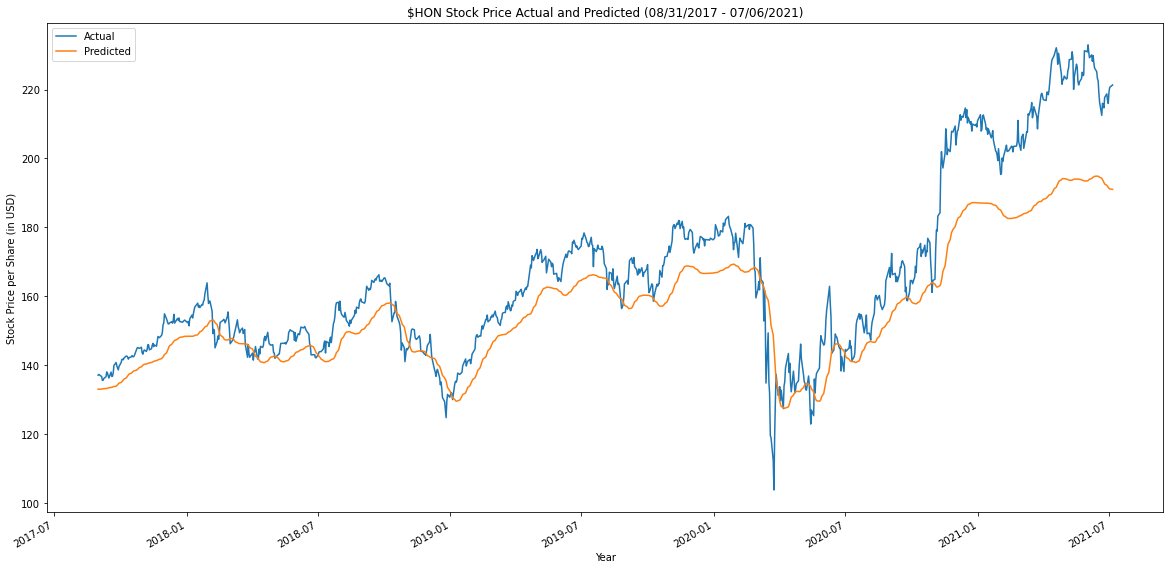

In [24]:
hon_actual_predicted.plot(figsize=(20,10))
plt.title('$HON Stock Price Actual and Predicted (08/31/2017 - 07/06/2021)')
plt.xlabel('Year')
plt.ylabel('Stock Price per Share (in USD)')
plt.legend(loc="best")
plt.show()